In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [3]:
data = pd.read_excel("E:\\materials\\Assignment\\Assignment18\\Airlines+Data.xlsx")
data.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


<AxesSubplot:>

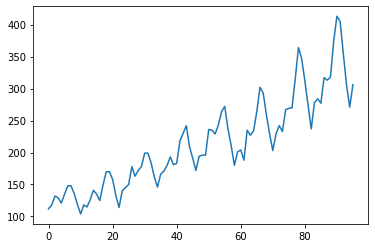

In [4]:
data.Passengers.plot()

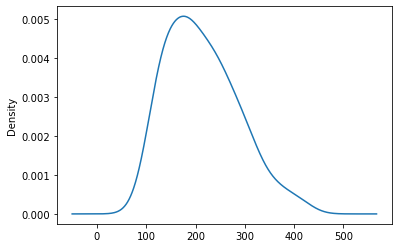

In [5]:
data.Passengers.plot(kind='kde')
plt.show()

In [5]:
data.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [6]:
data["Month"] = data.Month.dt.strftime("%b")

In [7]:
month_dummies = pd.DataFrame(pd.get_dummies(data['Month']))
data = pd.concat([data,month_dummies],axis = 1)
month_dummies

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,1,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,1
93,0,0,0,0,0,0,0,0,0,0,1,0
94,0,0,0,0,0,0,0,0,0,1,0,0


In [8]:
data = pd.concat([data,month_dummies],axis = 1)

In [9]:
data

,Month,Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,Jan,112,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,Feb,118,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,Mar,132,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,Apr,129,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,May,121,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Aug,405,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92,Sep,355,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
93,Oct,306,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
94,Nov,271,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [10]:
data["t"] = np.arange(1,97)

In [11]:
data["t_squared"] = data["t"]*data["t"]

In [12]:
data.columns

Index(['Month', 'Passengers', 'Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun',
       'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Apr', 'Aug', 'Dec', 'Feb', 'Jan',
       'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 't', 't_squared'],
      dtype='object')

In [13]:
data["log_Passengers"] = np.log(data["Passengers"])

In [14]:
data

,Month,Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,...,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_Passengers
0,Jan,112,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,4.718499
1,Feb,118,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,2,4,4.770685
2,Mar,132,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,3,9,4.882802
3,Apr,129,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,16,4.859812
4,May,121,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Aug,405,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,92,8464,6.003887
92,Sep,355,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,93,8649,5.872118
93,Oct,306,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,94,8836,5.723585
94,Nov,271,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,95,9025,5.602119


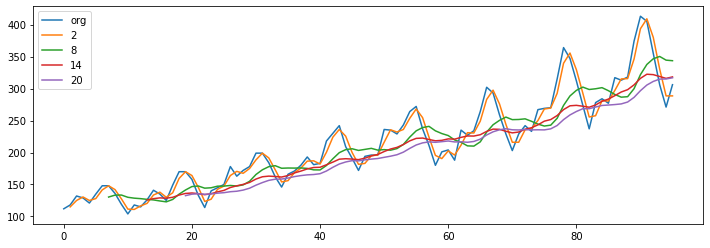

In [16]:
#Moving Average
plt.figure(figsize=(12,4))
data.Passengers.plot(label="org")
for i in range(2,24,6):
    data["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

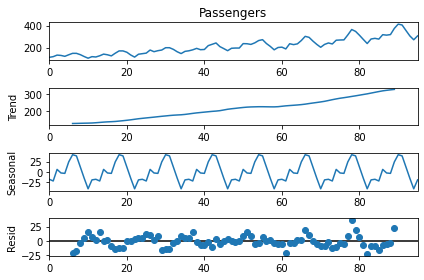

In [17]:
#Time series decomposition plot
decompose_ts_add = seasonal_decompose(data.Passengers,period=12)
decompose_ts_add.plot()
plt.show()

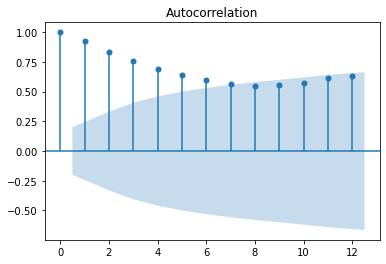

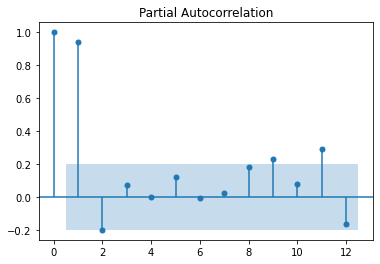

In [18]:
#ACF plots and PACF plots
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(data.Passengers,lags=12)
tsa_plots.plot_pacf(data.Passengers,lags=12)
plt.show()

<AxesSubplot:xlabel='Month', ylabel='Passengers'>

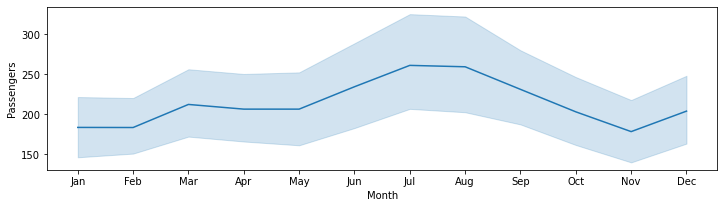

In [19]:
plt.figure(figsize=(12,3))
sns.lineplot(x="Month",y="Passengers",data=data)

In [20]:
# Splitting data
Train = data.head(80)
Test = data.tail(16)

In [21]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

47.542624067726734

In [22]:
#Exponential

Exp = smf.ols('log_Passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

43.79373939334317

In [23]:
#Quadratic 

Quad = smf.ols('Passengers~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

43.65440369584248

In [24]:
#Additive seasonality 

add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

129.26647641443301

In [25]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

23.910983570105927

In [26]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

135.32648414621045

In [27]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

9.469000230225937

In [28]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,9.469000
4,rmse_add_sea_quad,23.910984
2,rmse_Quad,43.654404
1,rmse_Exp,43.793739
0,rmse_linear,47.542624
3,rmse_add_sea,129.266476
5,rmse_Mult_sea,135.326484


In [ ]:
# we choose multiplicative additive seasonality model because it have low rmse